<a href="https://colab.research.google.com/github/Masuzyo/Thrivesummer/blob/main/Hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_diabetes
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)



# SECTION 1: THEORETICAL FOUNDATION

HYPOTHESIS TESTING BASICS:

1. NULL HYPOTHESIS (H₀): The claim we're testing against
2. ALTERNATIVE HYPOTHESIS (H₁): What we want to prove
3. SIGNIFICANCE LEVEL (α): Probability of Type I error (typically 0.05)
4. TEST STATISTIC: Calculated value used to make decision
5. P-VALUE: Probability of observing test statistic under H₀
6. CRITICAL VALUE: Threshold for rejection region

TYPES OF TESTS:
- ONE-SIDED (One-tailed): H₁: μ > μ₀ OR H₁: μ < μ₀
- TWO-SIDED (Two-tailed): H₁: μ ≠ μ₀

TEST SELECTION:
- One-sample t-test: Compare sample mean to known value
- Two-sample t-test: Compare means of two groups
- Use t-test when population σ unknown, z-test when σ known

# SECTION 2: ONE-SAMPLE T-TEST EXAMPLES



In [7]:
# Example 1: Iris Dataset - Sepal Length
print("\n--- EXAMPLE 1: Iris Dataset - Sepal Length ---")
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
sepal_length = iris_df['sepal length (cm)']

print(f"Dataset: Iris sepal length")
print(f"Sample size: {len(sepal_length)}")
print(f"Sample mean: {sepal_length.mean():.3f}")
print(f"Sample std: {sepal_length.std():.3f}")

# Two-sided test: Is mean sepal length different from 6.0?
print("\nTWO-SIDED TEST:")
print("H₀: μ = 6.0")
print("H₁: μ ≠ 6.0")
print("α = 0.05")

results = stats.ttest_1samp(sepal_length,6,alternative='two-sided')

print(f"\nResults:")
print(f"t-statistic: {result['t_statistic']:.4f}")
print(f"p-value: {result['p_value']:.4f}")
print(f"Critical value: ±{result['critical_value']:.4f}")
print(f"Decision: {result['decision']}")





--- EXAMPLE 1: Iris Dataset - Sepal Length ---
Dataset: Iris sepal length
Sample size: 150
Sample mean: 5.843
Sample std: 0.828

TWO-SIDED TEST:
H₀: μ = 6.0
H₁: μ ≠ 6.0
α = 0.05

Results:
t-statistic: -39.4927
p-value: 0.0000
Critical value: ±-1.6606
Decision: Reject H₀


In [8]:
result

{'mean1': np.float64(1.4620000000000002),
 'mean2': np.float64(4.26),
 'std1': 0.1736639964801841,
 'std2': 0.46991097723995806,
 'n1': 50,
 'n2': 50,
 't_statistic': np.float64(-39.49271939153809),
 'p_value': np.float64(2.7024552567208387e-62),
 'critical_value': np.float64(-1.6605512170440575),
 'decision': 'Reject H₀',
 'reject_null': np.True_}


Creating visualization for Iris sepal length hypothesis test...


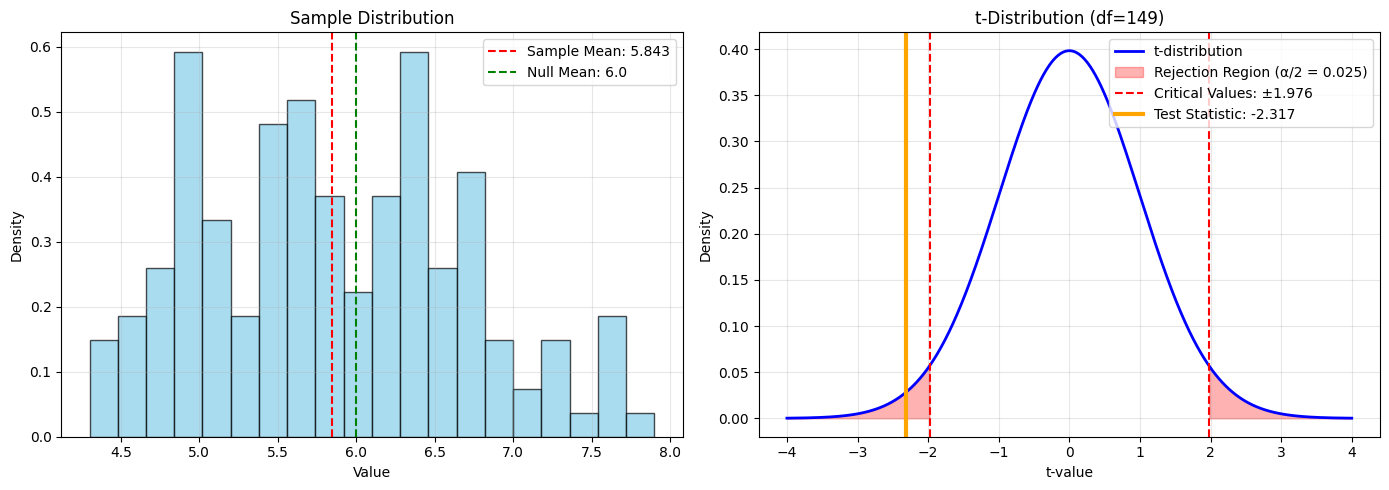

In [9]:
def plot_hypothesis_test_viz(data, null_mean, alternative='two-sided', alpha=0.05):
    """
    Create visualization for one-sample t-test
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plot 1: Data distribution
    ax1.hist(data, bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.axvline(np.mean(data), color='red', linestyle='--', label=f'Sample Mean: {np.mean(data):.3f}')
    ax1.axvline(null_mean, color='green', linestyle='--', label=f'Null Mean: {null_mean}')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Density')
    ax1.set_title('Sample Distribution')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: t-distribution with critical regions
    df = len(data) - 1
    t_stat = (np.mean(data) - null_mean) / (np.std(data, ddof=1) / np.sqrt(len(data)))

    x = np.linspace(-4, 4, 1000)
    y = stats.t.pdf(x, df)
    ax2.plot(x, y, 'b-', linewidth=2, label='t-distribution')

    if alternative == 'two-sided':
        critical_val = stats.t.ppf(1 - alpha/2, df)
        ax2.fill_between(x[x <= -critical_val], y[x <= -critical_val], alpha=0.3, color='red', label=f'Rejection Region (α/2 = {alpha/2})')
        ax2.fill_between(x[x >= critical_val], y[x >= critical_val], alpha=0.3, color='red')
        ax2.axvline(-critical_val, color='red', linestyle='--', label=f'Critical Values: ±{critical_val:.3f}')
        ax2.axvline(critical_val, color='red', linestyle='--')
    elif alternative == 'greater':
        critical_val = stats.t.ppf(1 - alpha, df)
        ax2.fill_between(x[x >= critical_val], y[x >= critical_val], alpha=0.3, color='red', label=f'Rejection Region (α = {alpha})')
        ax2.axvline(critical_val, color='red', linestyle='--', label=f'Critical Value: {critical_val:.3f}')
    elif alternative == 'less':
        critical_val = stats.t.ppf(alpha, df)
        ax2.fill_between(x[x <= critical_val], y[x <= critical_val], alpha=0.3, color='red', label=f'Rejection Region (α = {alpha})')
        ax2.axvline(critical_val, color='red', linestyle='--', label=f'Critical Value: {critical_val:.3f}')

    ax2.axvline(t_stat, color='orange', linewidth=3, label=f'Test Statistic: {t_stat:.3f}')
    ax2.set_xlabel('t-value')
    ax2.set_ylabel('Density')
    ax2.set_title(f't-Distribution (df={df})')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Create visualization for iris sepal length example
print("\nCreating visualization for Iris sepal length hypothesis test...")
plot_hypothesis_test_viz(sepal_length, 6.0, alternative='two-sided')

In [4]:
# One-sided test: Is mean sepal length greater than 5.5?
print("\nONE-SIDED TEST (Greater than):")
print("H₀: μ ≤ 5.5")
print("H₁: μ > 5.5")
print("α = 0.05")

result = stats.ttest_1samp(sepal_length, 5.5, alternative='greater')
print(f"\nResults:")
print(f"t-statistic: {result['t_statistic']:.4f}")
print(f"p-value: {result['p_value']:.4f}")
print(f"Critical value: {result['critical_value']:.4f}")
print(f"Decision: {result['decision']}")


ONE-SIDED TEST (Greater than):
H₀: μ ≤ 5.5
H₁: μ > 5.5
α = 0.05

Results:
t-statistic: 5.0780
p-value: 0.0000
Critical value: 1.6551
Decision: Reject H₀


In [ ]:
# Exercise 1
print("\n--- EXERCISE 1: Wine Dataset ---")
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
alcohol_content = wine_df['alcohol']

print("Dataset: Wine alcohol content")
print(f"Sample size: {len(alcohol_content)}")
print(f"Sample mean: {alcohol_content.mean():.3f}")
print(f"Sample std: {alcohol_content.std():.3f}")

print("\nTASK: Test if the mean alcohol content is different from 13.0%")
print("Set up your hypotheses and perform the test.")
print("\nYour code here:")
print("# H₀: μ = 13.0")
print("# H₁: μ ≠ 13.0")
print("# α = 0.05")
print("# result = perform_one_sample_ttest(alcohol_content, 13.0, alternative='two-sided')")